# Classifiation de textes

## Import libraries

In [2]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import nltk
from nltk import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import ngrams

from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
sns.set()

## Chargement des données

In [4]:
dt1 = pd.read_csv('datasets/Youtube01-Psy.csv')
dt2 = pd.read_csv('datasets/Youtube02-KatyPerry.csv')
dt3 = pd.read_csv('datasets/Youtube03-LMFAO.csv')
dt4 = pd.read_csv('datasets/Youtube04-Eminem.csv')
dt5 = pd.read_csv('datasets/Youtube05-Shakira.csv')

dt = pd.concat([dt1, dt2, dt3, dt4, dt5])
dt = dt[['CONTENT', 'CLASS']].copy()
dt = dt.sample(len(dt))
dt.head(10)

,CONTENT,CLASS
265,"9 year olds be like, 'How does this have 2 bil...",0
159,A friend of mine has invented a big dick form...,1
232,ALL SCHOOL DROP OUTS I KNEW AS FRIENDS BEFORE ...,1
158,5 years and i still dont get the music video h...,0
307,Katy Perry is lion﻿,0
54,she is beautiful but it is not American!﻿,0
276,&quot;HELP THE HUMANITY WITH YOUR SIGN IN TO T...,1
359,Check out this video on YouTube:﻿,1
49,Check out this video on YouTube:﻿,1
205,"I love katy fashions tiger, care to visit my b...",1


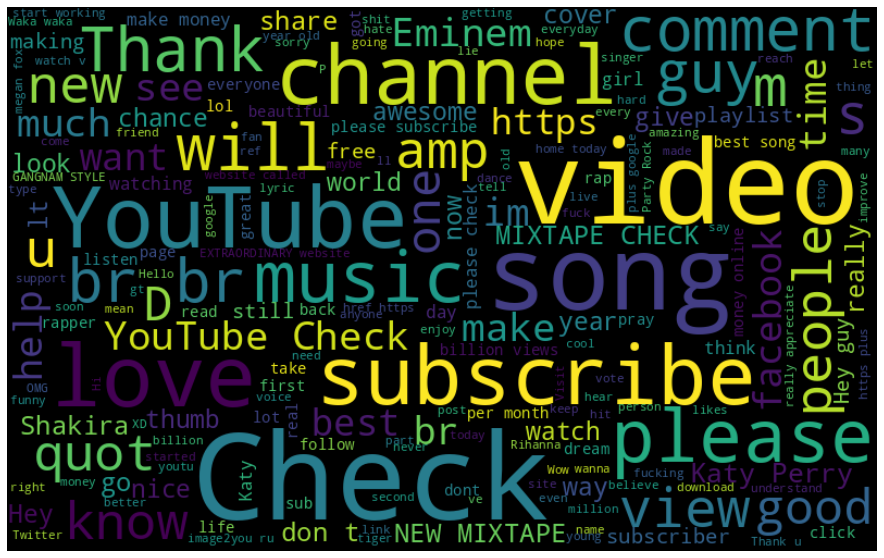

In [12]:
texts = " ".join(list(dt["CONTENT"]))
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(texts)

plt.figure(figsize=(16, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Exploration

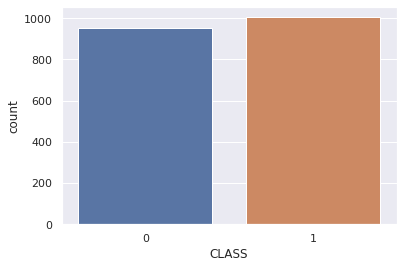

In [13]:
sns.countplot(x='CLASS', data=dt)
plt.show()

### 1. Normalisation

In [14]:
def norm(text):
    text = text.lower()
    for char in "0123456789_-()[]{}.,;:!$%~&|\^@°/*-+=":
        text = text.replace(char, '')
    return text

dt_n = dt
dt_n['CONTENT'] = dt['CONTENT'].apply(norm)
dt_n.head()

,CONTENT,CLASS
0,huh anyway check out this youtube channel koby...,1
1,hey guys check out my new channel and our firs...,1
2,just for test i have to say murdevcom,1
3,me shaking my sexy ass on my channel enjoy ﻿,1
4,watch?vvtarggvgtwq check this out ﻿,1


### 2. Tokenization

In [15]:
tokenize = lambda x : RegexpTokenizer(r'\w+').tokenize(x)

dt_tk = dt_n
dt_tk['CONTENT'] = dt_n['CONTENT'].apply(tokenize)
dt_tk.head()

,CONTENT,CLASS
0,"[huh, anyway, check, out, this, youtube, chann...",1
1,"[hey, guys, check, out, my, new, channel, and,...",1
2,"[just, for, test, i, have, to, say, murdevcom]",1
3,"[me, shaking, my, sexy, ass, on, my, channel, ...",1
4,"[watch, vvtarggvgtwq, check, this, out]",1


In [20]:
# Download stopwords
# nltk.download()
# nltk.download("stopwords")

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

### 3. Suppression des stopwords

In [17]:
stop_words = stopwords.words('english')
stp_w = lambda token : [word for word in token if word not in stop_words]

dt_stp = dt_tk
dt_stp['CONTENT'] = dt_tk['CONTENT'].apply(stp_w)
dt_stp.head()

,CONTENT,CLASS
0,"[huh, anyway, check, youtube, channel, kobyoshi]",1
1,"[hey, guys, check, new, channel, first, vid, u...",1
2,"[test, say, murdevcom]",1
3,"[shaking, sexy, ass, channel, enjoy]",1
4,"[watch, vvtarggvgtwq, check]",1


### 4. Lemmatization

In [21]:
# nltk.download('wordnet
              
lemma = WordNetLemmatizer()
lemmatize = lambda token : [lemma.lemmatize(lemma.lemmatize(lemma.lemmatize(word, 'v'), 'a'), 'n') for word in token]

dt_lem = dt_stp
dt_lem['CONTENT'] = dt_stp['CONTENT'].apply(lemmatize)
dt_lem.head()

,CONTENT,CLASS
0,"[huh, anyway, check, youtube, channel, kobyoshi]",1
1,"[hey, guy, check, new, channel, first, vid, u,...",1
2,"[test, say, murdevcom]",1
3,"[shake, sexy, as, channel, enjoy]",1
4,"[watch, vvtarggvgtwq, check]",1


In [22]:
join = lambda token : ' '.join(token)

dt_f = dt_lem
dt_f['CONTENT'] = dt_lem['CONTENT'].apply(join)
dt_f.head()

,CONTENT,CLASS
0,huh anyway check youtube channel kobyoshi,1
1,hey guy check new channel first vid u monkey m...,1
2,test say murdevcom,1
3,shake sexy as channel enjoy,1
4,watch vvtarggvgtwq check,1


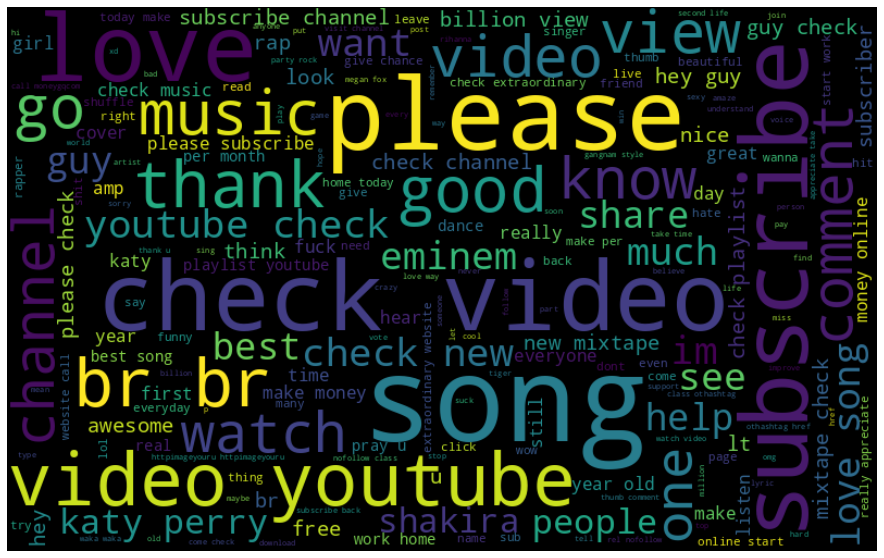

In [23]:
texts = " ".join(list(dt["CONTENT"]))
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(texts)

plt.figure(figsize=(16, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Modélisation

In [ ]:
vect = TfidfVectorizer(stop_words='english',
                       analyzer='word',
                       ngram_range=(1,2))
tfidf_mat = vect.fit_transform(dt_f.CONTENT)
feature_names = vect.get_feature_names()
dense = tfidf_mat.todense()
dense_list = dense.tolist()

data = pd.DataFrame(dense_list, columns=feature_names)
data.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, dt.CLASS, test_size=0.25)

## Entraînement

In [ ]:
svm = LinearSVC()
svm.fit(X_train, y_train)

## Evaluation

In [ ]:
y_pred = svm.predict(X_test)

print('F1 Score : ', f1_score(y_test, y_pred))

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Vraie classe')
plt.ylabel('Classe prédite')
plt.title('Matrice de confusion')
plt.show()